In [41]:
from bs4 import BeautifulSoup
import time
import pandas as pd
import json
from collections import Counter

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
from scipy.stats import norm

In [42]:
df = pd.read_csv('mp_data_final.csv')

df.head(10)

,Unnamed: 0,Sno,Name,Profile_url,Party,State_x,Exp,email,Father_Name,Mother_Name,...,2014,2019,Age,Wiki Output,TOTAL Votes secured,Total Voted,Total Electors,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,NumofOpponents
0,0,1,A. Raja Shri,http://loksabhaph.nic.in/Members/MemberBioprof...,Dravida Munnetra Kazhagam,Tamil Nadu,"11,13,14,15,17",raja.andimuthu@gmail.com a.raja@sansad.nic.in,Shri S.K. Andimuthu,Smt. Chinnapillai,...,No,Yes,58.0,Andimuthu Raja (born Sathyaseelan; 26 October ...,547832.0,1011049.0,1366060.0,40.10307,54.184515,11.0
1,1,2,Aaroon Rasheed Shri J.M.,http://loksabhaph.nic.in/Members/MemberBioprof...,Indian National Congress,Tamil Nadu,"14,15",jm.aaronrasheed@sansad.nic.in,Shri Jamal Mohideen,Smt. S.J.M.H. Bivi,...,No,No,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,Abbaiah Shri Narayana Swamy,http://loksabhaph.nic.in/Members/MemberBioprof...,Bharatiya Janata Party,Karnataka,17,anarayanaswamyanekal5@gmail.com a.narayanswamy...,Shri Abbaiah,Smt. Thimmakka,...,No,Yes,65.0,Abbaiah Narayanaswamy is an Indian politician ...,626195.0,1246506.0,1760633.0,35.56647,50.236020,20.0
3,3,4,Abbasi Kazi Jalil,http://loksabhaph.nic.in/Members/MemberBioprof...,Congress (I),Uttar Pradesh,"7,8",NaN,NaN,NaN,...,No,No,NaN,Kazi Jalil Abbasi (1912-1996) was a freedom fi...,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,Abdul Lateef Shri,http://loksabhaph.nic.in/Members/MemberBioprof...,Indian National Congress,Andhra Pradesh,6,NaN,NaN,NaN,...,No,No,NaN,Yusef Abdul Lateef (born William Emanuel Huddl...,NaN,NaN,NaN,NaN,NaN,NaN
5,5,6,Abdul Rahman Shri,http://loksabhaph.nic.in/Members/MemberBioprof...,Dravida Munnetra Kazhagam,Tamil Nadu,15,rahmanexec@yahoo.com,Shri Mohaideen Abdul Kader,Smt. Ainul Marlia,...,No,No,63.0,Abdul Rahman bin Faisal Al Saud (Arabic: عبد ا...,NaN,NaN,NaN,NaN,NaN,NaN
6,6,7,Abdul Samad Shri A.K.A.,http://loksabhaph.nic.in/Members/MemberBioprof...,Congress (I),Tamil Nadu,"7,9",NaN,NaN,NaN,...,No,No,NaN,A.K.A. Abdul Samad (Tamil: அப்துல் சமது) (4 Oc...,NaN,NaN,NaN,NaN,NaN,NaN
7,7,8,Abdul Shafee Shri,http://loksabhaph.nic.in/Members/MemberBioprof...,Indian National Congress,Maharashtra,5,NaN,NaN,NaN,...,No,No,NaN,Abdul Shafee (23 November 1925 – 26 April 200...,NaN,NaN,NaN,NaN,NaN,NaN
8,8,9,Abdullabhai Mulla Taherali Mulla,http://loksabhaph.nic.in/Members/MemberBioprof...,Indian National Congress,Madhya Pradesh,1,NaN,NaN,NaN,...,No,No,NaN,Mulla Abdullabhai Taherali also known as Mulla...,NaN,NaN,NaN,NaN,NaN,NaN
9,9,10,Abdullah Begum Akbar Jahan,http://loksabhaph.nic.in/Members/MemberBioprof...,National Conference,Jammu and Kashmir,"6,8",NaN,NaN,NaN,...,No,No,NaN,Akbar Jehan Abdullah (1916 – 11 July 2000) was...,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# duplicate = df[df.duplicated(['Name','Party','Exp'])]
# len(duplicate)
# duplicate
# unq = df['Sno'].unique()
# print(len(unq))

df.drop_duplicates(subset =['Name','Party','Exp'],
                     keep = False, inplace = True)
 
# displaying data
len(df)

5091

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5091 entries, 0 to 5197
Data columns (total 47 columns):
Unnamed: 0                                 5091 non-null int64
Sno                                        5091 non-null int64
Name                                       5091 non-null object
Profile_url                                5091 non-null object
Party                                      5091 non-null object
State_x                                    5058 non-null object
Exp                                        5091 non-null object
email                                      1390 non-null object
Father_Name                                2046 non-null object
Mother_Name                                1725 non-null object
DOB                                        2060 non-null object
Place_Of_Birth                             2034 non-null object
Education                                  1844 non-null object
Profession                                 1784 non-null object

In [45]:
#total number of rows and col
df.shape

#df1.count

(5091, 47)

In [46]:
#find missing values in data

numeric_val = df.columns[df.dtypes != 'object']
cat_val = df.columns[df.dtypes == 'object']

print(numeric_val)
print(cat_val)

df[numeric_val].isnull().sum()
df[cat_val].isnull().sum()

Index(['Unnamed: 0', 'Sno', 'Elected', 'Age', 'TOTAL Votes secured',
       'Total Voted', 'Total Electors', 'OVER TOTAL ELECTORS IN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED IN CONSTITUENCY', 'NumofOpponents'],
      dtype='object')
Index(['Name', 'Profile_url', 'Party', 'State_x', 'Exp', 'email',
       'Father_Name', 'Mother_Name', 'DOB', 'Place_Of_Birth', 'Education',
       'Profession', 'Permanent_Address', 'Present_Address', 'Gender',
       'Reservation', 'Constituency', 'Is_Sitting_MP', 'Side', '1952', '1957',
       '1962', '1967', '1971', '1977', '1980', '1984', '1989', '1991', '1996',
       '1998', '1999', '2004', '2009', '2014', '2019', 'Wiki Output'],
      dtype='object')


Name                    0
Profile_url             0
Party                   0
State_x                33
Exp                     0
email                3701
Father_Name          3045
Mother_Name          3366
DOB                  3031
Place_Of_Birth       3057
Education            3247
Profession           3307
Permanent_Address    3226
Present_Address      3226
Gender                  0
Reservation             0
Constituency           33
Is_Sitting_MP           0
Side                    0
1952                    0
1957                    0
1962                    0
1967                    0
1971                    0
1977                    0
1980                    0
1984                    0
1989                    0
1991                    0
1996                    0
1998                    0
1999                    0
2004                    0
2009                    0
2014                    0
2019                    0
Wiki Output          1568
dtype: int64

In [47]:
# uniqe party names since 1952 
df['Party'].unique()

array(['Dravida Munnetra Kazhagam', 'Indian National Congress',
       'Bharatiya Janata Party', 'Congress (I)', 'National Conference',
       'Jammu and Kashmir National Conference',
       'Communist Party of India (Marxist)', 'Communist Party(Marxist)',
       "Peoples' Democratic Front", 'Biju Janata Dal',
       'Tamil Manila Congress (Moopanar)', 'Shiv Sena',
       'All India Trinamool Congress', 'Communist Party',
       'Rashtriya Janata Dal', 'Jan Sangh', 'Indian Union Muslim League',
       'Bahujan Samaj Party', 'Samajwadi Party', 'Janata Party',
       'Praja Socialist Party (PSP)', 'Asom Gana Parishad', 'Janata Dal',
       'All India United Democratic Front', 'Telugu Desam Party',
       'Shiromani Akali Dal', 'Communist Party of India', 'Independent',
       'Bharipa Bahujan Mahasangha', 'Swatantra Party', 'Independents',
       'United Interparliaemntary Group', 'Samata Party',
       'All India Rashtriya Janata Party',
       'All India Anna Dravida Munnetra Kazhagam'

78


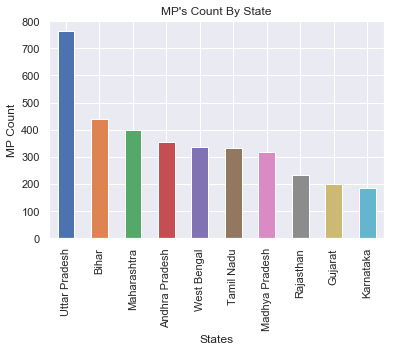

In [48]:
vv = df['State_x'].unique()
print(len(vv))
df.State_x.value_counts().nlargest(10).plot(kind='bar')
plt.title("MP's Count By State")
plt.xlabel('States')
plt.ylabel('MP Count');

138


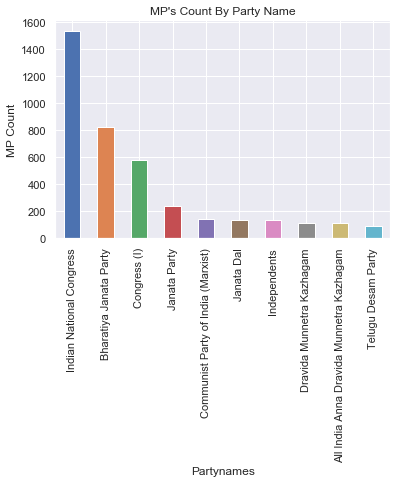

In [49]:
vv = df['Party'].unique()
print(len(vv))
df.Party.value_counts().nlargest(10).plot(kind='bar')
plt.title("MP's Count By Party Name")
plt.xlabel('Partynames')
plt.ylabel('MP Count');

11


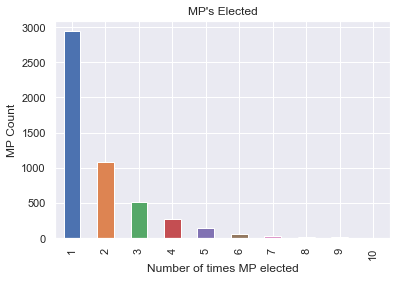

In [50]:
vv = df['Elected'].unique()
print(len(vv))
df.Elected.value_counts().nlargest(10).plot(kind='bar')
plt.title("MP's Elected")
plt.xlabel('Number of times MP elected')
plt.ylabel('MP Count');

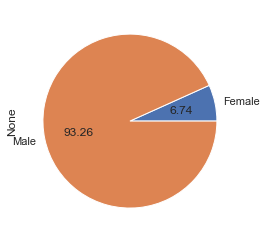

In [51]:
df.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

In [61]:
# df.groupby('Side').size().plot(kind='pie', autopct='%.2f')

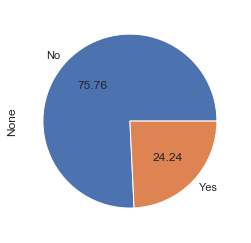

In [53]:
df.groupby('Reservation').size().plot(kind='pie', autopct='%.2f')

## EDA on 17th term data (latest)

In [54]:
df1 = df[df['Is_Sitting_MP'] == 'Yes']
len(df1)

545

38


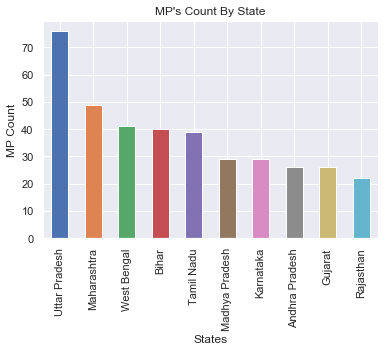

In [62]:
vv = df1['State_x'].unique()
print(len(vv))
df1.State_x.value_counts().nlargest(10).plot(kind='bar')
plt.title("MP's Count By State")
plt.xlabel('States')
plt.ylabel('MP Count');

36


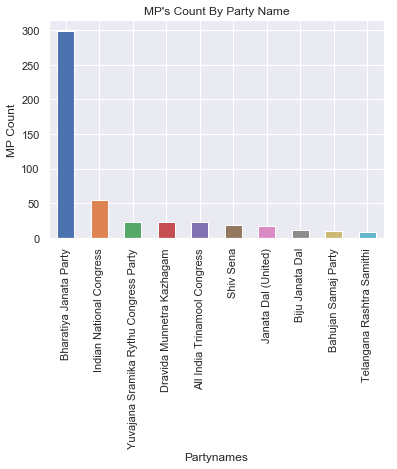

In [63]:
vv = df1['Party'].unique()
print(len(vv))
df1.Party.value_counts().nlargest(10).plot(kind='bar')
plt.title("MP's Count By Party Name")
plt.xlabel('Partynames')
plt.ylabel('MP Count');

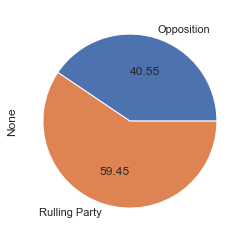

In [55]:
df1.groupby('Side').size().plot(kind='pie', autopct='%.2f')

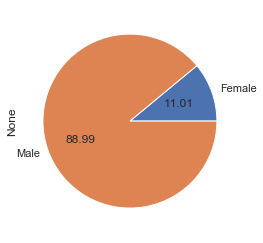

In [56]:
df1.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

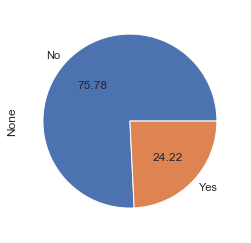

In [57]:
df1.groupby('Reservation').size().plot(kind='pie', autopct='%.2f')

In [60]:
df1['Age'].describe()

count    542.000000
mean      57.487085
std       11.272577
min       28.000000
25%       50.000000
50%       58.000000
75%       66.000000
max       91.000000
Name: Age, dtype: float64